<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

In [1]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
file_name = "m4_survey_data.sqlite"

response = requests.get(url)

with open(file_name, 'wb') as f:
    f.write(response.content)

print(f"Downloaded file as {file_name}")


Downloaded file as m4_survey_data.sqlite


Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


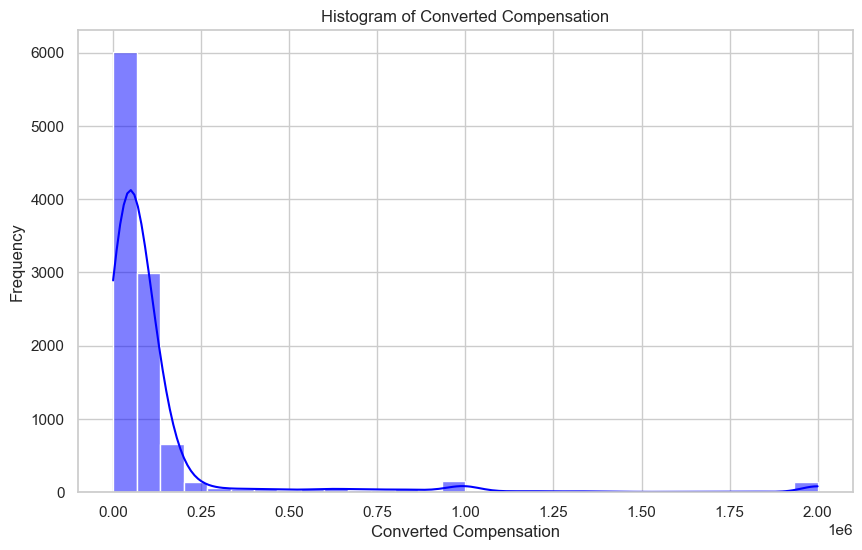

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to retrieve the ConvertedComp column from the master table
query = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(query, conn)

# Drop rows with null values in the ConvertedComp column
df = df.dropna(subset=['ConvertedComp'])

# Set seaborn style for visualizations
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], bins=30, kde=True, color='blue')

# Set labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the histogram
plt.show()



### Box Plots


Plot a box plot of `Age.`


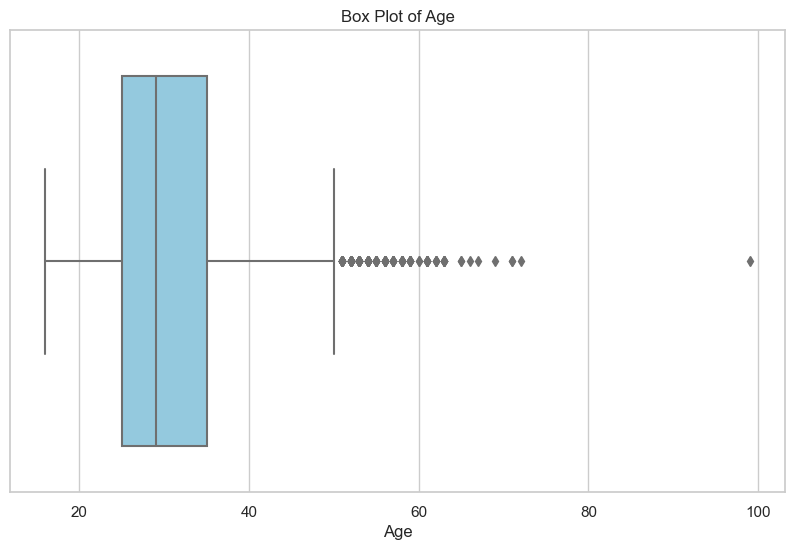

In [9]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to retrieve the Age column from the master table
query = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(query, conn)

# Drop rows with null values in the Age column
df = df.dropna(subset=['Age'])

# Set seaborn style for visualizations
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df, color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.title('Box Plot of Age')

# Show the box plot
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


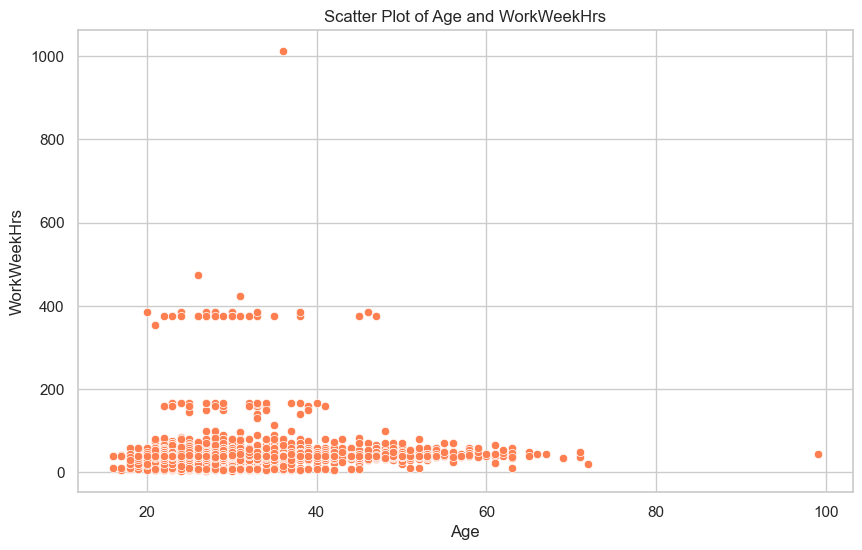

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to retrieve the Age and WorkWeekHrs columns from the master table
query = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(query, conn)

# Drop rows with null values in Age or WorkWeekHrs columns
df = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Set seaborn style for visualizations
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df, color='coral')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age and WorkWeekHrs')

# Show the scatter plot
plt.show()




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


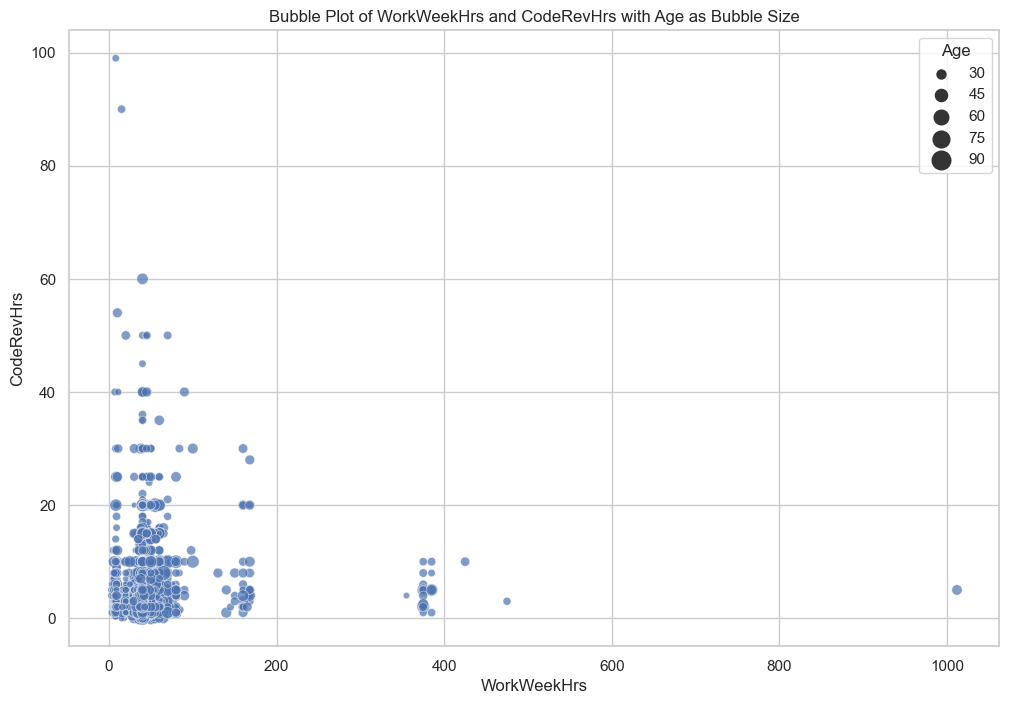

In [11]:
# Query to retrieve the WorkWeekHrs, CodeRevHrs, and Age columns from the master table
query = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df = pd.read_sql_query(query, conn)

# Drop rows with null values in WorkWeekHrs, CodeRevHrs, or Age columns
df = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Set seaborn style for visualizations
sns.set(style="whitegrid")

# Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(10, 200), data=df, alpha=0.7, palette='viridis')

# Set labels and title
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs with Age as Bubble Size')

# Show the bubble plot
plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


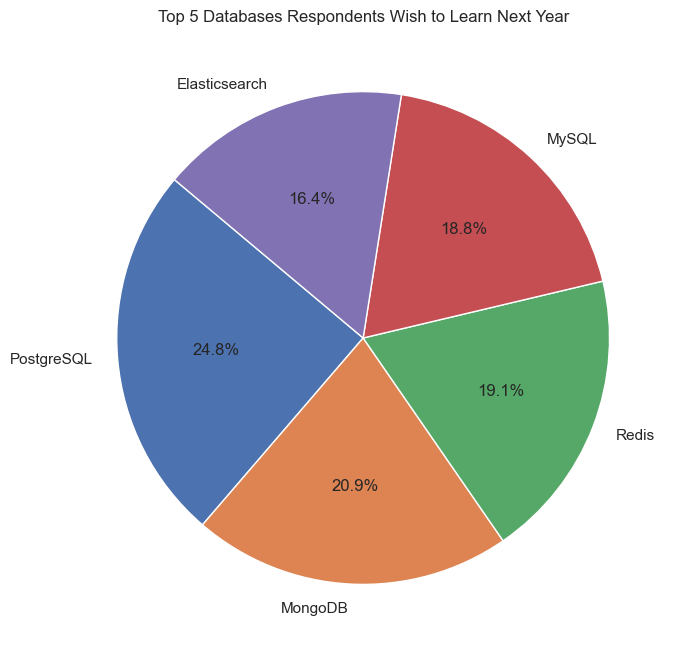

In [38]:
# Query to retrieve the top 5 databases respondents wish to learn next year
query = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""
df = pd.read_sql_query(query, conn)

# Set the figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(df['count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)

# Set title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

# Display the pie chart
plt.show()



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


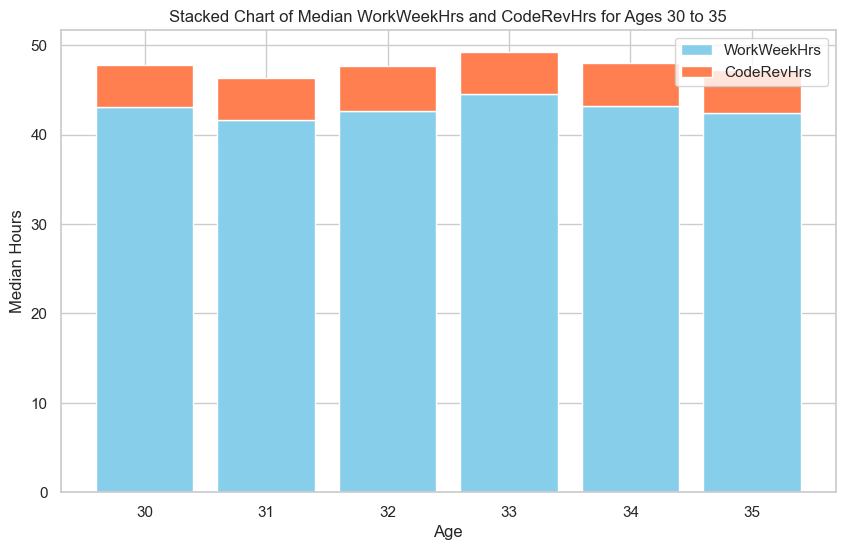

In [31]:
# Query to retrieve the median WorkWeekHrs and CodeRevHrs for the age group 30 to 35
query = """
SELECT Age,
       AVG(WorkWeekHrs) as MedianWorkWeekHrs,
       AVG(CodeRevHrs) as MedianCodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
"""
df = pd.read_sql_query(query, conn)

# Set seaborn style for visualizations
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a stacked chart
plt.bar(df['Age'], df['MedianWorkWeekHrs'], label='WorkWeekHrs', color='skyblue')
plt.bar(df['Age'], df['MedianCodeRevHrs'], label='CodeRevHrs', color='coral', bottom=df['MedianWorkWeekHrs'])

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Ages 30 to 35')

# Show the legend
plt.legend()

# Show the stacked chart
plt.show()


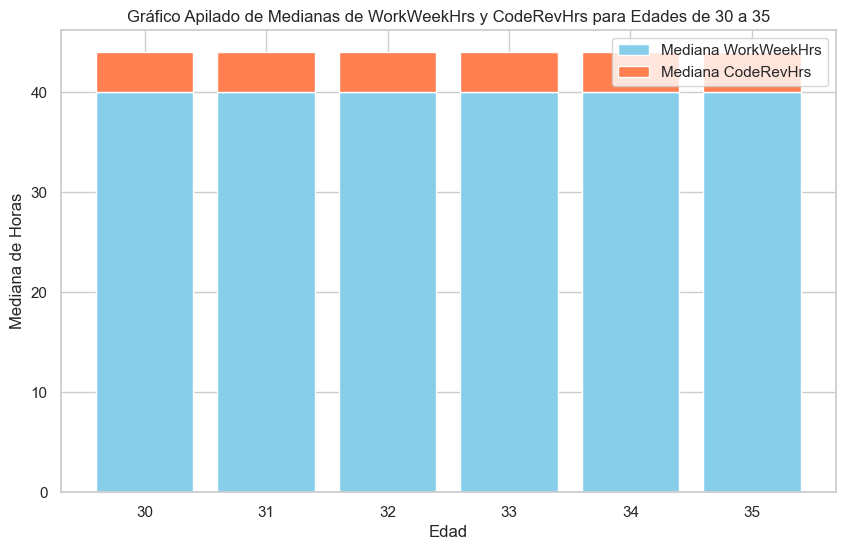

In [32]:
# Consulta para obtener los datos de WorkWeekHrs y CodeRevHrs para edades de 30 a 35
query = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(query, conn)

# Calcular la mediana por edad para WorkWeekHrs
median_work_week_hrs = df.groupby('Age')['WorkWeekHrs'].median().reset_index()

# Calcular la mediana por edad para CodeRevHrs
median_code_rev_hrs = df.groupby('Age')['CodeRevHrs'].median().reset_index()

# Configurar el estilo de seaborn para visualizaciones
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras apiladas
plt.bar(median_work_week_hrs['Age'], median_work_week_hrs['WorkWeekHrs'], label='Mediana WorkWeekHrs', color='skyblue')
plt.bar(median_code_rev_hrs['Age'], median_code_rev_hrs['CodeRevHrs'], label='Mediana CodeRevHrs', bottom=median_work_week_hrs['WorkWeekHrs'], color='coral')

# Configurar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Mediana de Horas')
plt.title('Gráfico Apilado de Medianas de WorkWeekHrs y CodeRevHrs para Edades de 30 a 35')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico de barras apiladas
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


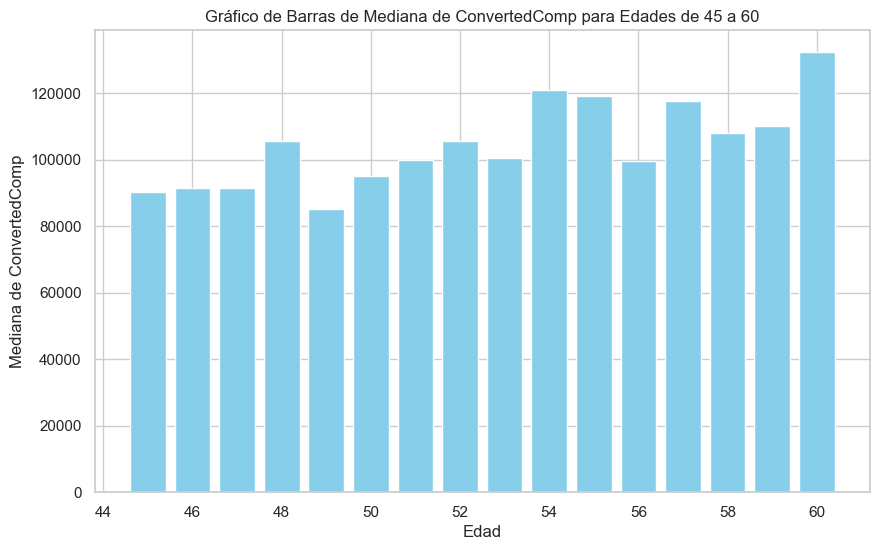

In [35]:
# Consulta para obtener los datos de ConvertedComp para edades de 45 a 60
query = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(query, conn)

# Calcular la mediana por edad para ConvertedComp
median_converted_comp = df.groupby('Age')['ConvertedComp'].median().reset_index()

# Configurar el estilo de seaborn para visualizaciones
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras apiladas
plt.bar(median_converted_comp['Age'], median_converted_comp['ConvertedComp'], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Mediana de ConvertedComp')
plt.title('Gráfico de Barras de Mediana de ConvertedComp para Edades de 45 a 60')

# Mostrar el gráfico de barras apiladas
plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


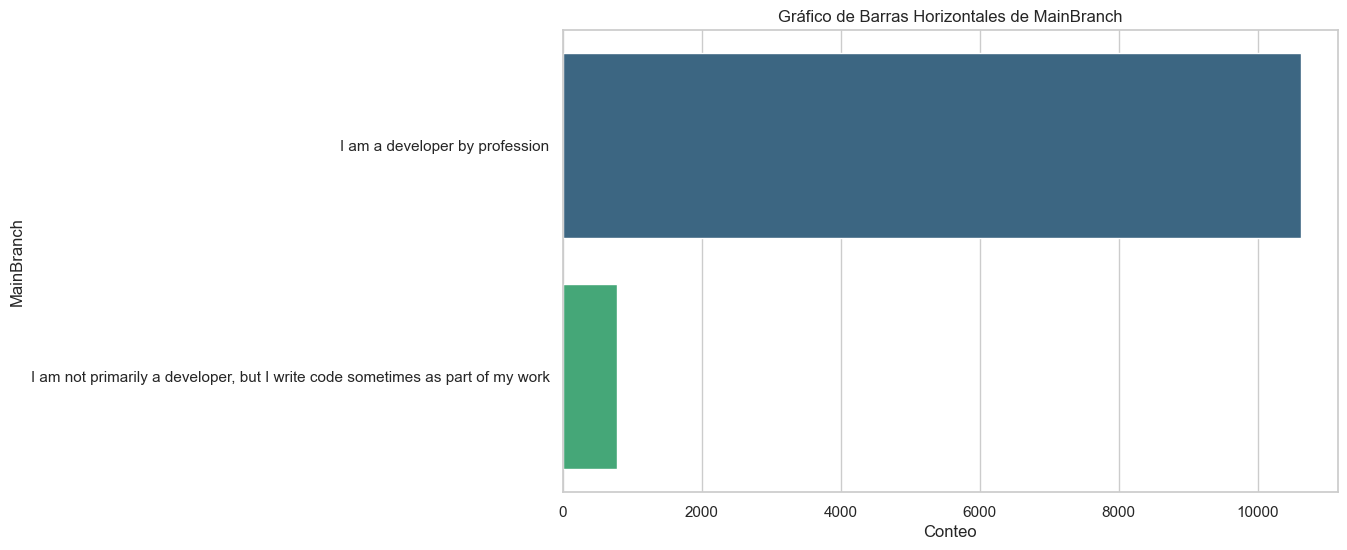

In [34]:
# Consulta para obtener los datos de la columna MainBranch
query = """
SELECT MainBranch, COUNT(*) as Count
FROM master
GROUP BY MainBranch
"""
df = pd.read_sql_query(query, conn)

# Configurar el estilo de seaborn para visualizaciones
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras horizontales
sns.barplot(x='Count', y='MainBranch', data=df, palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Conteo')
plt.ylabel('MainBranch')
plt.title('Gráfico de Barras Horizontales de MainBranch')

# Mostrar el gráfico
plt.show()



Close the database connection.


In [36]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


### Question 2 QUIZ

Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

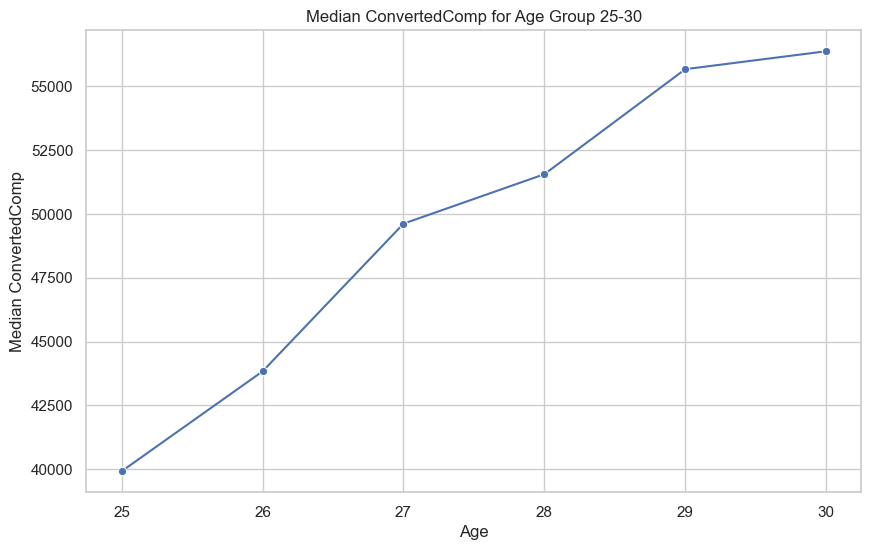

In [39]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Define the age group (25-30)
age_group_query = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""

# Read data into a Pandas DataFrame
df = pd.read_sql_query(age_group_query, conn)

# Calculate the median ConvertedComp for each age
median_converted_comp = df.groupby('Age')['ConvertedComp'].median().reset_index()

# Set the style using Seaborn
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='ConvertedComp', data=median_converted_comp, marker='o')

# Set title and labels
plt.title('Median ConvertedComp for Age Group 25-30')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')

# Show the plot
plt.show()
